In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
def load_data(file):
    return pd.read_csv(file)

# compute summary statistics of data
def summarise_data(df):
    print(df.describe())

# call functions
df = load_data('London_Listings.csv')
summarise_data(df)

                 id       host_id  host_listings_count  \
count  6.667900e+04  6.667900e+04         66678.000000   
mean   6.129241e+17  2.058000e+08            28.557110   
std    4.728136e+17  1.975357e+08           152.576905   
min    1.391300e+04  2.594000e+03             1.000000   
25%    3.982489e+07  2.764800e+07             1.000000   
50%    8.040000e+17  1.274832e+08             2.000000   
75%    1.030000e+18  4.024643e+08            11.000000   
max    1.180000e+18  5.831673e+08          2566.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               66678.000000  66679.000000  66679.000000  66679.000000   
mean                   53.579606     51.509255     -0.128281      3.417733   
std                   354.866876      0.049343      0.103179      2.106704   
min                     1.000000     51.295937     -0.497800      1.000000   
25%                     1.000000     51.484038     -0.190809      2.000000   
50%      

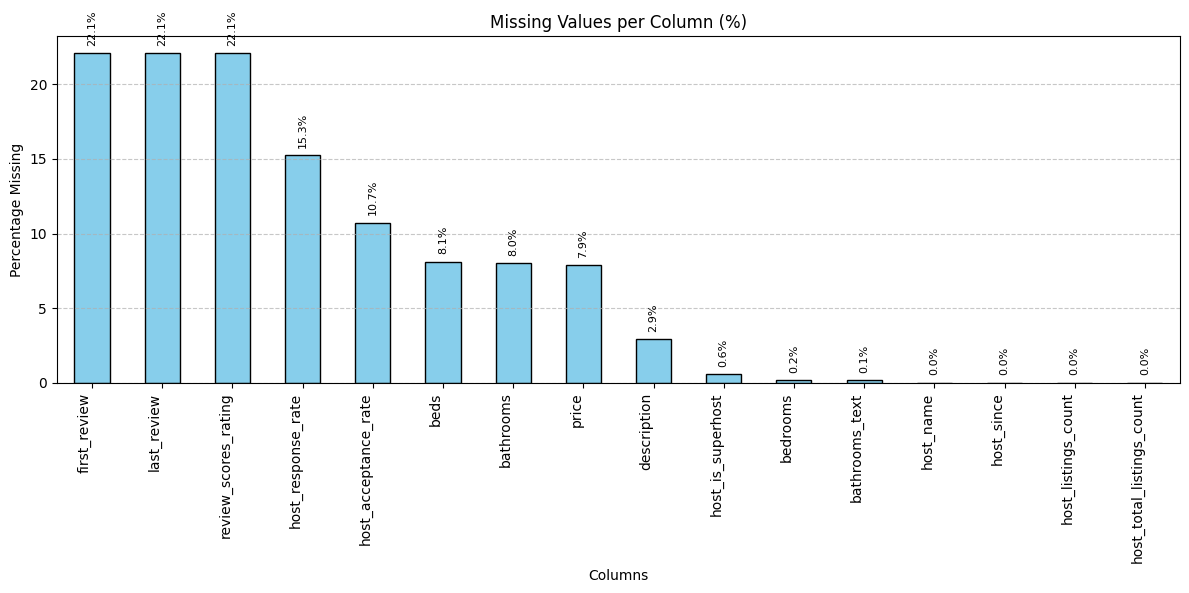

In [15]:
# visualise missing values
def visualize_missing_values(df, threshold=0.0):
    # find percentage of missing vals
    missing_percent = (df.isnull().sum() / len(df)) * 100

    # filter columns above threshold
    missing_percent = missing_percent[missing_percent > threshold]

    if missing_percent.empty:
        print("No missing values above threshold found in the dataset.")
        return

    # sort descending
    missing_percent = missing_percent.sort_values(ascending=False)

    # plot bar chart
    plt.figure(figsize=(12, 6))
    ax = missing_percent.plot(kind='bar', color='skyblue', edgecolor='black')

    # annotate bars with %
    for i, v in enumerate(missing_percent):
        ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=8, rotation=90)

    plt.title('Missing Values per Column (%)')
    plt.xlabel('Columns')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

visualize_missing_values(df)

In [ ]:
def initial_clean(df):
    # replace N/A with np.nan
    df.replace("N/A", np.nan, inplace=True)
    
    # convert percentages
    df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float)
    
    # remove dollar sign and comma from price
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

    # convert to bool
    df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

    # date parsing
    date_cols = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)


    return df

summarise_data(initial_clean(df))


TypeError: '<' not supported between instances of 'str' and 'int'

<Figure size 1000x600 with 0 Axes>

📈 1. Target Variable (price)
Distribution plot: Is it skewed? Use log-transform if right-skewed

Boxplots by:

room_type, property_type, neighbourhood

host_is_superhost, has_reviews

📉 2. Correlation Analysis
Use sns.heatmap(df.corr(numeric_only=True))

Explore correlation between price, beds, bedrooms, review_scores_rating, etc.

🧩 3. Categorical Value Counts
room_type, property_type, neighbourhood: Check top values and consider consolidating rare categories into “Other”

🗺️ 4. Geo Visualization
Map listings using latitude and longitude colored by price to identify geographic trends

🧪 5. Feature Interaction
Group by room_type + accommodates and see mean price

Check price distribution by superhost status and property type